#### Welcome to a project I really wanted to try out. This is mainly something I wanted to do in order to really test myself on the skills I have been learning thoughout the past few months, so I wanted to do this with a topic I have been very intersting in for a long time, video games. The main thing a wanted to look into as its alwas a topic of discussion is the rating of video games through the lens of video game jornalists and typical customers. 

#### Beforehand, into the 90's up until the early 00's, if you wanted to figure out if a game you wanted to buy was good, you either rely on your friends if they had it, or just figure it out yourself. Now, there a whole slew of websites you can find to make your own option, with one of the biggest being Metacritic, a site for rating movies and tv shows, and especially video games. Here you can look for a specific game and not only see how many video game jornalists felt about it, but also people that bought the game for themselves. 

#### Athough this has made look for games more convient, once in a while there is always a game that comes out that is raved by critics, but is felt diffrently by the gerenral public and likewise. Also, once in a while, I might hear or see that critic review dont really signify how the public might see aboutit, which again has examples. This obviously makes sense, as critics and users are playing these games under diffrent mindsets, one side is playing the game because its their job to, and the other out of their own enjoyment. One has a limited time to put out a review before the game launches or the embargo lifts,depending on when they get a review copy, and the other has all the time in the world. However, I wanted to see how big that discrepancy can be, and premise is what made what to see what the data would show if a dug into it. 

#### This ended up turning a entire process of caomparing games scores between crits and users, calcualting the descrepancies between them, and also seeing how average games scores change thoughout the years 

In [1]:
import numpy as np 
import pandas as pd 

#### For the data set, I am using a Metacritic dataframe that contains most games on the site along with their ratings, plaform,release date, developer(s), genre(s), along with how many critics and users rated the game. As many games come out of multiple platforms, many games will shopw up more than once, but will have diffrent rating, as Metacritc does separate rating for each platform the game is on. 
Ex. On row 3 and 5, Grand Theft Auto 5 shows up, however the platforms are diffrent and have different user scores

In [2]:
game_scores = pd.read_csv('/kaggle/input/metacritic-videogames-data/games-data.csv')
game_scores.head()

,name,platform,r-date,score,user score,developer,genre,players,critics,users
0,The Legend of Zelda: Ocarina of Time,Nintendo64,"November 23, 1998",99,9.1,Nintendo,"Action Adventure,Fantasy",1 Player,22,5749
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",98,7.4,NeversoftEntertainment,"Sports,Alternative,Skateboarding",1-2,19,647
2,Grand Theft Auto IV,PlayStation3,"April 29, 2008",98,7.6,RockstarNorth,"Action Adventure,Modern,Modern,Open-World",1 Player,64,3806
3,SoulCalibur,Dreamcast,"September 8, 1999",98,8.5,Namco,"Action,Fighting,3D",1-2,24,324
4,Grand Theft Auto IV,Xbox360,"April 29, 2008",98,7.9,RockstarNorth,"Action Adventure,Modern,Modern,Open-World",1 Player,86,3364


## EDA

By using the shape attibute, we can see how many rows and columns the dataframe contains. This dataframe has 17944 rows, meaning 17944 games, and 10 columns. 

In [3]:
game_scores.shape

(17944, 10)

Using the columns attirbute will show all 10 columns names.

In [4]:
game_scores.columns

Index(['name', 'platform', 'r-date', 'score', 'user score', 'developer',
       'genre', 'players', 'critics', 'users'],
      dtype='object')

Using the info() function will give a summary of the dataframe, which includes the columns names, the amount of values that are not null or empty, and most importantly the dtype of each column. This is most helpful in order to check if the dtypes are as they are supposed to be and if they have to be changed. 

In [5]:
game_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17944 entries, 0 to 17943
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        17944 non-null  object
 1   platform    17944 non-null  object
 2   r-date      17944 non-null  object
 3   score       17944 non-null  int64 
 4   user score  17944 non-null  object
 5   developer   17944 non-null  object
 6   genre       17944 non-null  object
 7   players     17922 non-null  object
 8   critics     17944 non-null  int64 
 9   users       17944 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 1.4+ MB


Based on the summary, the only columns that needs to be changed is the user score, as it is an object instead of an interger. It will be needed to be an interger in order to compare it with the critic score.

The conversion would also be helpful inorder to see the distributions of the scores, which won't be shown since it is not in a numerical format. For example, when calling the discribe function,whichis used to show basic statistical details about each column, the user score will not show.(By using the parameter 'include' and setting it to all, all columns will show up, just with limited information.)

In [6]:
game_scores.describe(include='all')

,name,platform,r-date,score,user score,developer,genre,players,critics,users
count,17944,17944,17944,17944.000000,17944,17944,17944,17922,17944.000000,17944.000000
unique,11762,22,4357,NaN,95,4253,2042,55,NaN,NaN
top,Madden NFL 07,PC,"November 14, 2006",NaN,tbd,Capcom,"Action,Platformer,2D",No Online Multiplayer,NaN,NaN
freq,9,4592,48,NaN,1286,298,529,4792,NaN,NaN
mean,NaN,NaN,NaN,70.386647,NaN,NaN,NaN,NaN,23.149799,172.797983
std,NaN,NaN,NaN,12.410885,NaN,NaN,NaN,NaN,17.152985,1280.291974
min,NaN,NaN,NaN,11.000000,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,63.000000,NaN,NaN,NaN,NaN,11.000000,11.000000
50%,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,NaN,17.000000,28.000000
75%,NaN,NaN,NaN,79.000000,NaN,NaN,NaN,NaN,30.000000,90.000000


Before changing the dataframe dtypes, it would helpful to see if there were any missing values in any of the columns thast might make the processing harder than it needs to be. By using 'isnull()', it will check if any columns have any null values, and by using the 'sum()' function alongside it, it will count the amount of null values in each column.

In [7]:
# first check of null values 
game_scores.isnull().sum()

name           0
platform       0
r-date         0
score          0
user score     0
developer      0
genre          0
players       22
critics        0
users          0
dtype: int64

Well, it says that only the players column, which shows if the game has 1 players, cooperative, and or multiplayer, has missing values, but it seems that the user score might have some string thats substituing for an empty score, whic would not show in the above line. In fact, which the describe fuction used, the value that had the highest frequency was 'tbd', which would prevent the column to be chaged to a interger. So, the why to get arount is this is by changing the the tbd numbers to NaN. 

With the replace function, the tbd value can be replaced with Nan using numpy. Then, by using the same 'isnull().sum()' combination with the user score column, the actual amount of null values will be showed. 

In [8]:
#replaceing tbd with NaN, since trying to convert user score to in gave an error
game_scores['user score'].replace('tbd', np.nan, inplace = True)

#checking howe many null values. Will not modify, important to keep for analysis sake.
game_scores['user score'].isnull().sum()

1286

Here, it is shown that there are actual 1286 missing. Here there are two options, either drop the columns that have null values or just leave them. At first, I decided to keep them, as I though that the critic scores along with the other information such as the release date whould be important still. However, I in the end remove those rows to the make the later comparions more fair, and also with the amount of games, 1286 rows removed would not change much.

In [9]:
game_scores.dropna(subset=['user score'], axis=0, inplace=True)

After this, I was finally able to change the user score columns from an object to an interger, making it possible to compare thecritic and user score. By using the 'astype' function, multplying it my 10 to make it more comparable to the critic score, the valuses were changed tot he proper format.

In [10]:
#changing score from object to float, them multiplying by 10 to match the meta score
game_scores['user score'] = game_scores['user score'].astype('float') * 10
game_scores['user score'] = game_scores['user score'].astype('int')

In [11]:
game_scores.head()

,name,platform,r-date,score,user score,developer,genre,players,critics,users
0,The Legend of Zelda: Ocarina of Time,Nintendo64,"November 23, 1998",99,91,Nintendo,"Action Adventure,Fantasy",1 Player,22,5749
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",98,74,NeversoftEntertainment,"Sports,Alternative,Skateboarding",1-2,19,647
2,Grand Theft Auto IV,PlayStation3,"April 29, 2008",98,76,RockstarNorth,"Action Adventure,Modern,Modern,Open-World",1 Player,64,3806
3,SoulCalibur,Dreamcast,"September 8, 1999",98,85,Namco,"Action,Fighting,3D",1-2,24,324
4,Grand Theft Auto IV,Xbox360,"April 29, 2008",98,79,RockstarNorth,"Action Adventure,Modern,Modern,Open-World",1 Player,86,3364


Here when checking the dtype, we can see that it was successful changed to type int64.

In [12]:
game_scores['user score'].dtype

dtype('int64')

## Data Formatting
Here, I wanted the change the formatting of the dataset it make it a bit easier and understandable. Here I changed columns names as well as added new features I felt would be beneficial to the project.

The first order of business was chaging the column names to something more understandable. 'score', was changed to 'critic score', to make it more obvious that the column was for crtic scores, as well as 'critics' and 'users to 'crtics amount' and 'user amount', to show that these columns are for the amount of those who rating said games.

In [13]:
#renaming the columns to be more understandable
game_scores.rename(columns={'score':'critic score', 'critics':'critics amount', 'users':'users amount'}, inplace=True)
game_scores.columns

Index(['name', 'platform', 'r-date', 'critic score', 'user score', 'developer',
       'genre', 'players', 'critics amount', 'users amount'],
      dtype='object')

The next step,which I though would be the most important, was to make a new column for the percent difference between the critic snd user score, which is calculated by taking the absolute value of the critic subtractied by the user score then divideing it by the critic plus the user score, then multplying the entre thing by 100. this waws then added as a new column in the dataframe that shows the discrepancy percentage of each game.

In [14]:
## percent diffrence between critic score and user score
game_scores['percent_difference'] = abs(game_scores['critic score'] - game_scores['user score']) \
                                    / ((game_scores['critic score'] + game_scores['user score'])/2) * 100
game_scores.head()

,name,platform,r-date,critic score,user score,developer,genre,players,critics amount,users amount,percent_difference
0,The Legend of Zelda: Ocarina of Time,Nintendo64,"November 23, 1998",99,91,Nintendo,"Action Adventure,Fantasy",1 Player,22,5749,8.421053
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",98,74,NeversoftEntertainment,"Sports,Alternative,Skateboarding",1-2,19,647,27.906977
2,Grand Theft Auto IV,PlayStation3,"April 29, 2008",98,76,RockstarNorth,"Action Adventure,Modern,Modern,Open-World",1 Player,64,3806,25.287356
3,SoulCalibur,Dreamcast,"September 8, 1999",98,85,Namco,"Action,Fighting,3D",1-2,24,324,14.207650
4,Grand Theft Auto IV,Xbox360,"April 29, 2008",98,79,RockstarNorth,"Action Adventure,Modern,Modern,Open-World",1 Player,86,3364,21.468927


Here I wanted to check how many games each platform had out of curiosity and if this could be helpful for any later analysis

In [15]:
#checking the pltforms that are imcluded in the list. do not include stadia(too little), PS5, XSX(too recent of this dataset.)
game_scores['platform'].value_counts()

PC                 4436
PlayStation4       1852
Xbox360            1593
PlayStation2       1302
PlayStation3       1232
XboxOne            1021
Switch             1004
Xbox                659
Wii                 605
DS                  569
PSP                 460
GameCube            411
3DS                 386
GameBoyAdvance      336
PlayStationVita     253
WiiU                185
PlayStation         160
Dreamcast           121
Nintendo64           70
Stadia                3
Name: platform, dtype: int64

Since there is a column that shows when a game released, it would be helpful for analysis is it was switch to the datetime formate of yyyy/mm/dd, which is more used. In order to do this, all it took was to use the the pandas 'to_datetime' function and use the release year column for conversion. What comes out is a converted that is way more helpful.

As an extra, I also decided to make a separate column exclusively for the year, as the months and days aren't as important except for the measurements over time. This was done by using the pandas 'DatetimeIndex' dunction and specifying the year portion. 

In [16]:
# converting the release date to a more easier to work with datetime format.
game_scores['r-date'] = pd.to_datetime(game_scores['r-date'])
game_scores.head()

,name,platform,r-date,critic score,user score,developer,genre,players,critics amount,users amount,percent_difference
0,The Legend of Zelda: Ocarina of Time,Nintendo64,1998-11-23,99,91,Nintendo,"Action Adventure,Fantasy",1 Player,22,5749,8.421053
1,Tony Hawk's Pro Skater 2,PlayStation,2000-09-20,98,74,NeversoftEntertainment,"Sports,Alternative,Skateboarding",1-2,19,647,27.906977
2,Grand Theft Auto IV,PlayStation3,2008-04-29,98,76,RockstarNorth,"Action Adventure,Modern,Modern,Open-World",1 Player,64,3806,25.287356
3,SoulCalibur,Dreamcast,1999-09-08,98,85,Namco,"Action,Fighting,3D",1-2,24,324,14.207650
4,Grand Theft Auto IV,Xbox360,2008-04-29,98,79,RockstarNorth,"Action Adventure,Modern,Modern,Open-World",1 Player,86,3364,21.468927


In [17]:
## creating a column for just the year
game_scores['r-year'] = pd.DatetimeIndex(game_scores['r-date']).year
game_scores.head()

,name,platform,r-date,critic score,user score,developer,genre,players,critics amount,users amount,percent_difference,r-year
0,The Legend of Zelda: Ocarina of Time,Nintendo64,1998-11-23,99,91,Nintendo,"Action Adventure,Fantasy",1 Player,22,5749,8.421053,1998
1,Tony Hawk's Pro Skater 2,PlayStation,2000-09-20,98,74,NeversoftEntertainment,"Sports,Alternative,Skateboarding",1-2,19,647,27.906977,2000
2,Grand Theft Auto IV,PlayStation3,2008-04-29,98,76,RockstarNorth,"Action Adventure,Modern,Modern,Open-World",1 Player,64,3806,25.287356,2008
3,SoulCalibur,Dreamcast,1999-09-08,98,85,Namco,"Action,Fighting,3D",1-2,24,324,14.207650,1999
4,Grand Theft Auto IV,Xbox360,2008-04-29,98,79,RockstarNorth,"Action Adventure,Modern,Modern,Open-World",1 Player,86,3364,21.468927,2008


With all the maor data formatiing done for now, lets use the describe function again to see some of the basic statistics so we can get some early insights of the data.

In [18]:
game_scores.describe()

,critic score,user score,critics amount,users amount,percent_difference,r-year
count,16658.000000,16658.000000,16658.000000,16658.000000,16658.000000,16658.000000
mean,70.964702,69.886061,24.025753,186.137351,14.363828,2010.802797
std,12.385077,13.610182,17.425370,1327.860899,15.929651,5.870484
min,11.000000,2.000000,0.000000,0.000000,0.000000,1995.000000
25%,64.000000,63.000000,11.000000,14.000000,4.081633,2006.000000
50%,73.000000,73.000000,18.000000,33.000000,9.523810,2011.000000
75%,80.000000,79.000000,31.000000,100.000000,18.867925,2016.000000
max,99.000000,98.000000,126.000000,146262.000000,187.692308,2020.000000


Since the user score was turned into an interger, it now shows up in the table without using the include all parameter. 

Fisrt of all, when looking at the critic and user scores, it doesn;t really seem all that diffrent; the mean, and most of the percentiles look about the same, except for the minimum, which is 11 for
critics, but 2 for users. Despite this, we can;t really determine that mucjh for now.

In terms of the percent difference, the average diffrence seems it be around 14%. The most interesting value, however, is the maximum value which comes to around 188%, which could be a huge difference depending of the range of the two numbers. For example 188% could be the difference between  90 and 3 or between 9 and 0.3, so further analysis will have to be done

For the release year, the earliest record is in 1995, with the latest being in 2020.

To make things a little bit easier, I decided to make different datasets, sorted by the user score and percnt difference. By using the sort_values function, I could specify which column I wanted to sort by and by which order. Bother where sorted in decending order and just in case,I showed the first five rows of the dataframe sorted by user score to see what the first games were. They are completly diffrent than what the critic scores were. What was even more surprising was that in all five games, what the users though as acclaimed, the critics rated as mostly mixed. THis shows a bit of disagreement, which is also apparent in the percent differences.

In [19]:
# making a separate dataframe with data sorted by user score and percent difference
game_scores_user = game_scores.sort_values(['user score'], ascending=False, axis=0)
game_difference = game_scores.sort_values(['percent_difference'],  ascending=False, axis=0)
game_scores_user.head()

,name,platform,r-date,critic score,user score,developer,genre,players,critics amount,users amount,percent_difference,r-year
4565,GrimGrimoire,PlayStation2,2007-06-26,79,98,VanillaWare,"Strategy,Real-Time,Fantasy",1 Player,39,2314,21.468927,2007
4664,Rochard,PlayStation3,2011-09-27,79,97,RecoilGames,"Action,Adventure,General,General,Platformer,2D",No info,34,465,20.454545,2011
10265,Tengami,WiiU,2014-11-13,70,97,Nyamyam,"Adventure,General",No info,15,675,32.335329,2014
10608,Diaries of a Spaceport Janitor,PC,2016-09-16,69,97,SundaeMonth,"Simulation,Virtual,Career",No Online Multiplayer,7,2495,33.734940,2016
8967,After Burner Climax,Xbox360,2010-04-21,72,97,SegaAM2,"Simulation,Flight,Modern Jet,Modern Jet,Combat",No info,31,579,29.585799,2010


Already, some diffrences can be seen. Completly different games.

The same was done for the percent diffrence, and yeahhh, that 187% we saw previously did have a pretty big range. It would seem that the critcs and users really didn't agree with neither the Playstation 4 or Xbox One versions of Madden NFL 21, with a range of 61and 65 respectivly, and the percent diffrence of 188% and 178%. The other noticable observation is that in the release year column, all five games came out in 2020, which was the latest year as of this dataframe.

In [20]:
# wow just from the first five rows.... 
game_difference.head()

,name,platform,r-date,critic score,user score,developer,genre,players,critics amount,users amount,percent_difference,r-year
13665,Madden NFL 21,PlayStation4,2020-08-25,63,2,EASports,"Sports,Team,Football,Sim",Up to 6,29,5363,187.692308,2020
10570,Madden NFL 21,XboxOne,2020-08-25,69,4,EASports,"Sports,Team,Football,Sim",Up to 6,20,994,178.082192,2020
4964,Tom Clancy's The Division 2: Warlords of New York,PC,2020-03-03,79,5,MassiveEntertainment,"Action,Shooter,Third-Person,Tactical",No info,19,1498,176.190476,2020
14808,Warcraft III: Reforged,PC,2020-01-28,59,6,BlizzardEntertainment,"Strategy,Real-Time,General",Online Multiplayer,46,30532,163.076923,2020
11173,NBA 2K21,PlayStation4,2020-09-04,68,7,VisualConcepts,"Sports,Team,Basketball,Arcade",Up to 10,49,446,162.666667,2020


With most of that out of the way, its time to start plotting in order preform further analysis on the data. This will be done with matplotlib along with seaborn, which are both plotting libraries, so it will be necessary it import them. 

In [21]:
#importing the needed libraries
import matplotlib.pyplot as plt
import seaborn as sns

First of all, the first thing i wanted to see was a boxplot of the user scores and critic scores, in order to compare the percentiles of the two. We already saw the percentiles with the describe function that was used before, however, visualizing it may show something that wasn't visible wit the numbers alone. One thing that these boxplots would show that the numbers would are the possible outliers in the data, which would signify scores that are way off from the typically ranges. 

By using matplotlib, a boxplot was made using the columns of critic and user scores next to each other in order to compare the two.

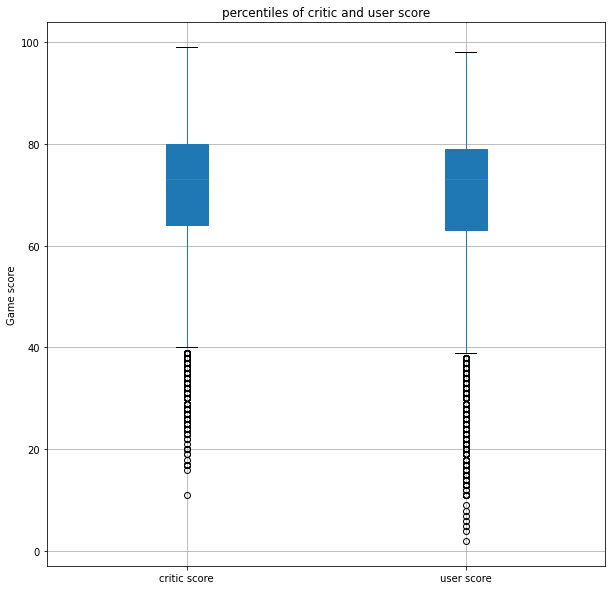

In [22]:
# boxplot of critic and user score
boxes = game_scores.boxplot(['critic score', 'user score'], figsize=(10,10),patch_artist=True)
plt.title('percentiles of critic and user score')
plt.ylabel('Game score')
plt.show()

Looking at the boxplots, there doesn't seem that muc diffrences between the percentiles or the min and max vaules. The two are not exactly identitcal, but they are close enough that nothing can really be concluded between the two. However, the major difference between the two are the outliers, which both had many of. This means that there are a lot of games that users and critics though were really unsatisfactory. One intersting thing though,is that the user score was a larger range of outliers,reaching all the way to what looks like around 3, while for critics the score only reaches to around 11. 

So, it seems that there are games that users rated lower than what critics rated it as.

Now its time to do the same thing for the percent differences, which will be done in the same way.

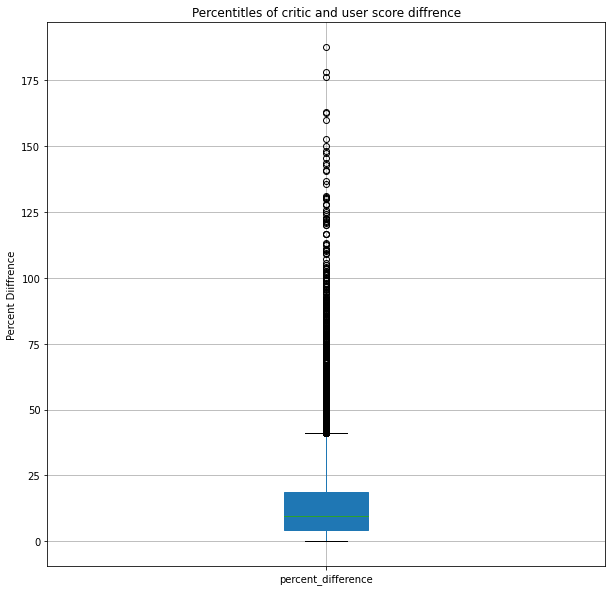

In [23]:
# boxplot of percent difference
box = game_scores.boxplot('percent_difference', figsize=(10,10),patch_artist=True)
plt.title('Percentitles of critic and user score diffrence')
plt.ylabel('Percent Diiffrence')
plt.show()

##### Wow, those are a lot of outliers
The thing about percent diffrence is that it is relative to the larger value, which means that 90 and 3 or 9 and 0.3 would give the same percent. That means that the percent may be huge, but the range between the two may not be that big. However, it is still dignificant to show the diffrence between the two numbers. Based on the plot, although the accepted max is around the 40s(calculated by), there are many values that past it, enough that the individual points are not visible and is just a black line.

Judging by the plot, it seems like most of the outliers are between the 40s to around 100s meaning that some of those values could be very huge between the critic and user scores.

Here a regression plot was done to see the correlations between the critic and user scores. If there is a good correlation between the two, as the critic score goes up, the user score should also go up, and with the points as close as to each other. Depending on the points, a correlation line should should also show the relationship between the two, whether positive, negative, or none at all. To create this plot, seaborn was used with its regplot function, making it possible to plot the user scores against the critic scores.

<AxesSubplot:xlabel='user score', ylabel='critic score'>

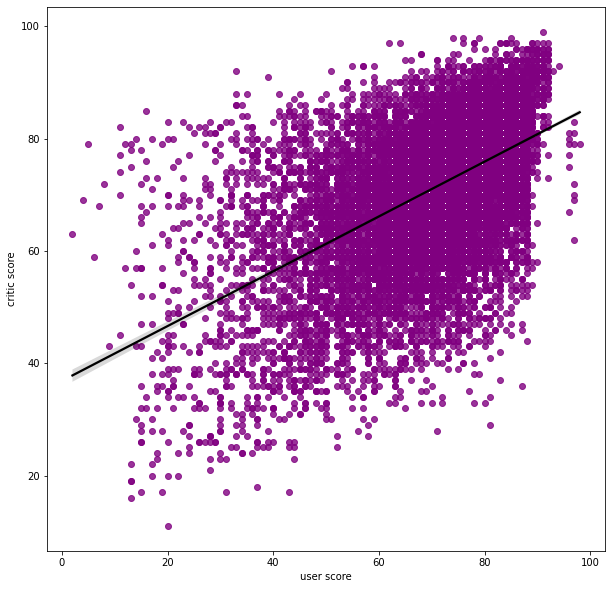

In [24]:
#regression plot to see if there is a correlation between user and critic scores
plt.figure(figsize=(10,10))
sns.regplot(x='user score', y='critic score', data=game_scores, color='purple', line_kws={'color':'black'})

According to the plot, there does seem to be a positive overall relationship between the two scores, according to the regression line. As the user score goes up, the critic score does also increase, which points staying reletively close to each other. However, there does seem to be a difference between the points in the lower user score range and higher one. In the higer portions of the scores, the points are pretty close together, which shows linearity between the critic and user scores. However, as the user scores decrease, the points seem to become more  scattered until the 20 mark, which shows points scatterd all over, showing less of an agreement between the two scores. 

Based on this, it could seem that in the higher ratings, critics and users do seem to agree a bit, but seem to have different opinions lower than that area.

The next step was making a bar plot, showing the top 50 games for both critics and users. Based the first 5 rows of dataframes sorted by critic and user scores, there were nomatching games, so it would interesting to see what games critics and users saw as the best. The first part in doing this is getting the first 50 rows of the games and their scores using the 'head' function and specifying the amount of rows needed for both dataframes. Then, by using seaborns barplot function, a barplot is made showing the 50 top games for critics and users. A horizontal barplot was used instead of a vertical one to make the plot understandable.

In [25]:
critics_top_name = game_scores['name'].head(50)
critics_top_score = game_scores['critic score'].head(50)
user_top_name = game_scores_user['name'].head(50)
user_top_score = game_scores_user['user score'].head(50)

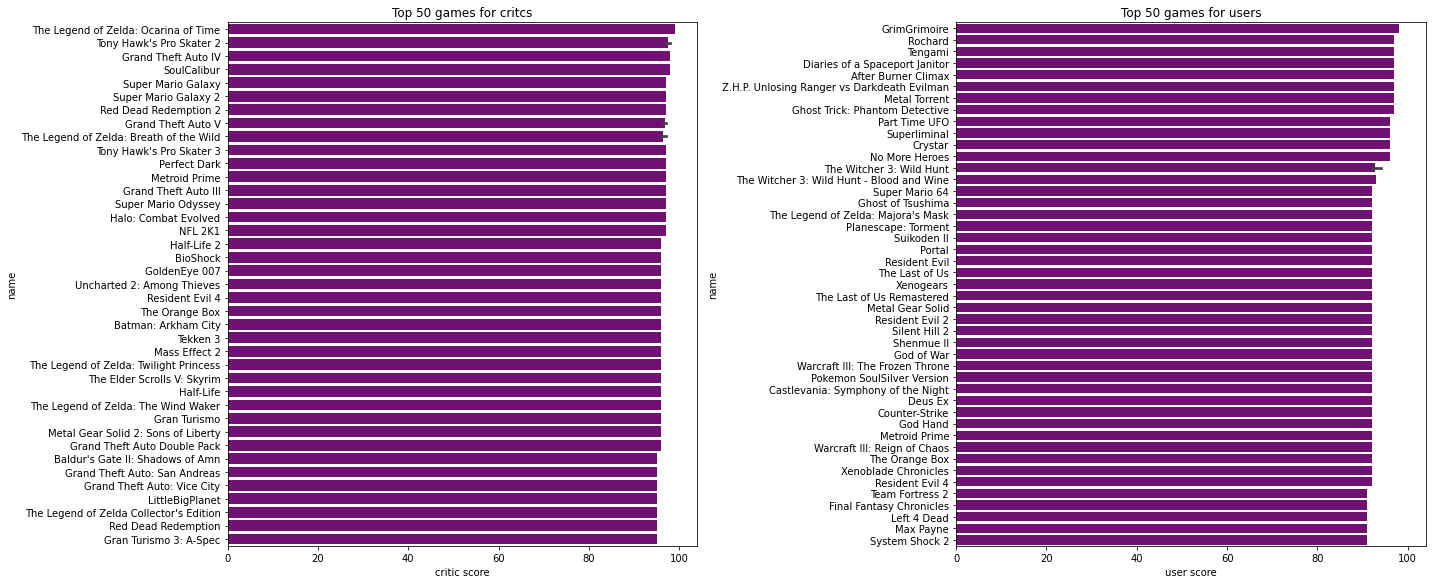

In [26]:
#showing top 50 games for critics and users
fig, (ax1, ax2) = plt.subplots(1,2, sharex=True, figsize=(20,8))
sns.barplot(y=critics_top_name,x=critics_top_score, ax=ax1, color='purple')
sns.barplot(y=user_top_name,x=user_top_score,color='purple', ax=ax2)
fig.tight_layout()
ax1.set_title('Top 50 games for critcs')
ax2.set_title('Top 50 games for users')
plt.show()

Similar to the to what was shown before, the top games for critics almost entirely do not match for user scores. The only two games that are in both plots are 'The Orange Box', a compilation games such as *Half Life 2* and its two other episodes, *Team Fortress 2*, and *Portal*, popular games developed by Valve, and *Resident Evil 4*, a horror game by Capcom. 

Other than those games, there seems to be no other similarites between the two.

Time to do the same for the percent differences. From the first 5 rows of the dataframe and the box plot, there seems to be many games that have a large difference between critic and user scores. With the bar plot for percent difference, the first 50 games will be shown. 

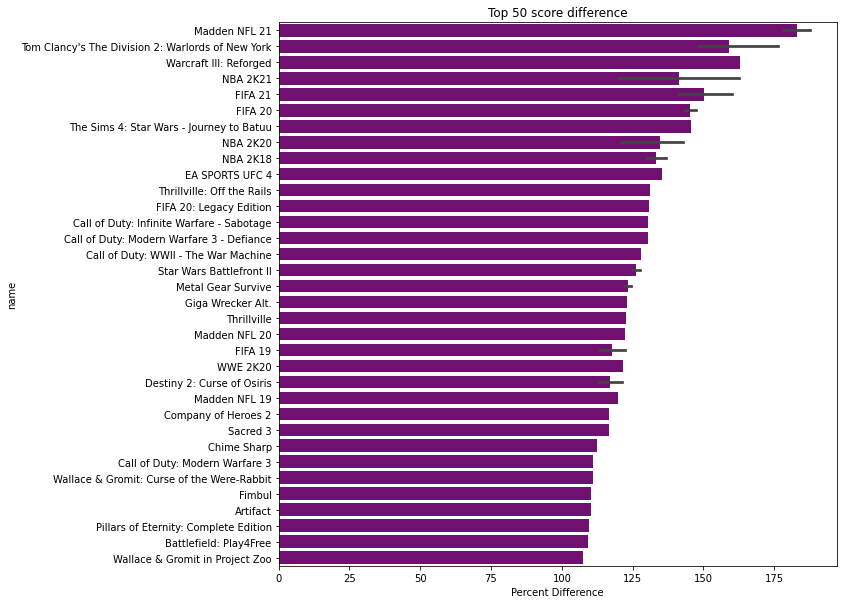

In [27]:
#most of these games came out in the past few years, percent differrences
difference_name = game_difference['name'].head(50)
difference_percent = game_difference['percent_difference'].head(50)
plt.figure(figsize=(10,10))
sns.barplot(y=difference_name, x=difference_percent,color='purple')
plt.title('Top 50 score difference')
plt.xlabel('Percent Difference')
plt.show()


All the games listed have a percent diffrence over 100%, which means that which these games, the difference between the two scores are more than double. 

Next was showing the distributions for the scores by using histogram plots of both critic and user scores. With this, the freqency of how many times a certain range of values were used as a score. This is helpful to see if there was any range that was used less or more in relation to the other. 

By using season's histplot, histograms were created that we shos the distributions of critc and user scores.

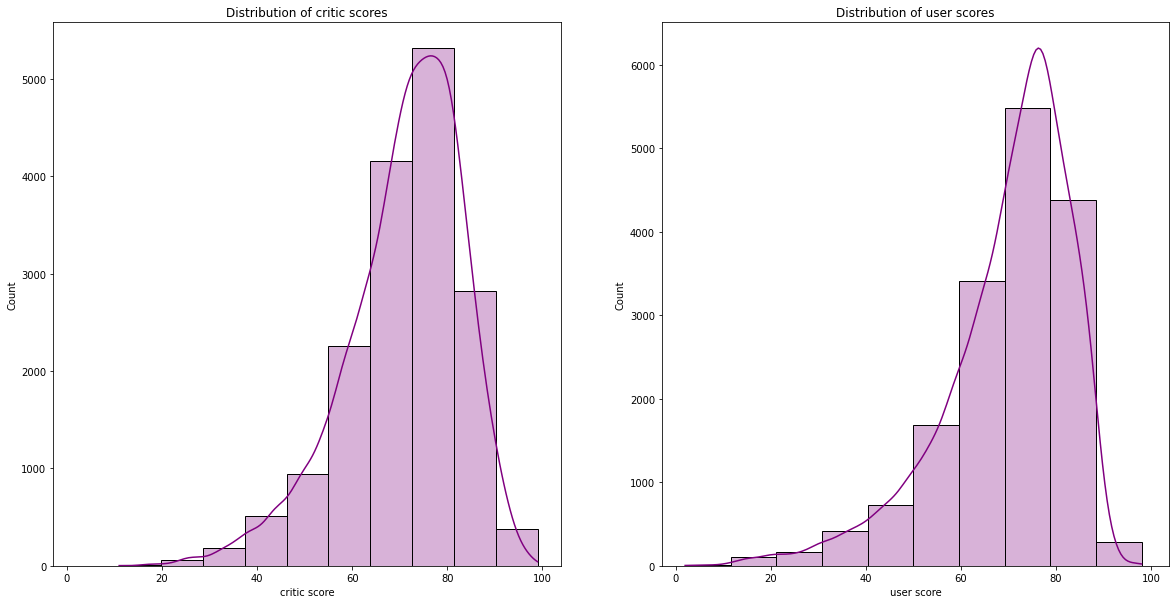

In [28]:
#histogram distributions of critic and user scores
fig, axes = plt.subplots(1,2, sharex=True, figsize=(20,10))
sns.histplot(data=game_scores, x='critic score', ax=axes[0], bins=10,kde=True, alpha=0.30, color='purple')
axes[0].set_title('Distribution of critic scores')
sns.histplot(data=game_scores, x='user score', ax=axes[1], bins=10,kde=True, alpha=0.30, color='purple')
axes[1].set_title('Distribution of user scores')
plt.show()

Looking at the plots, they both seems pretty similar, with the kde line looking almost similar although being a bit more narrow on the user score plot.

Time for the same except for the percent difference. 

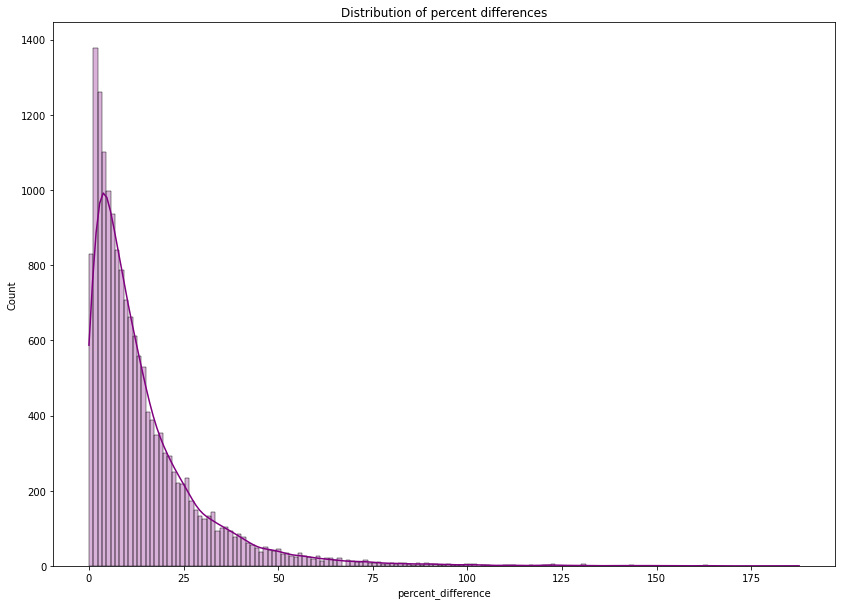

In [29]:
#seems that most games have small percent diffrences.
plt.figure(figsize=(14,10))
sns.histplot(data=game_scores, x='percent_difference',kde=True,color='purple', alpha=0.30)
plt.title('Distribution of percent differences')
plt.show()

Here, it looks like most of the values are between 0 and 25, with a big falloff as tthe perecentages get bigger, which were contributing the the huge amounts of outliers that wer shown on the boxplot.
The highest values seems to be around 2 or 3 percent, then immediatly goes downward.

### Time for binning

In [30]:
game_bins= game_scores[['name','r-year']].copy()

In [31]:
# binning critic and user score using metacritic own binning
def get_bins(df, col_name):
    grade_bin=list()
    
    for value in df:
        if value > 0 and value <20:
            grade_bin.append('Overwhelming Dislike')
        elif value >= 20 and value < 50:
            grade_bin.append('Generably Unfavorable')
        elif value >= 50 and value < 75:
            grade_bin.append('Mixed')
        elif value >=75 and value <90:
            grade_bin.append('Generably Favorable')
        elif value >= 90:
            grade_bin.append('Acclaimed')
        else:
            grade_bin.append(np.nan)
        
    game_bins[col_name] = grade_bin

get_bins(game_scores['critic score'], 'critic_bin')
get_bins(game_scores['user score'], 'user_bin')
game_bins.head()
#game_bins['critic_bin'] = pd.cut(game_scores['critic score'], bins, labels=group_names, include_lowest=True)
#game_bins['user_bin'] = pd.cut(game_scores['user score'], bins, labels=group_names, include_lowest=True)
#binning percent diffrence(has to be done custom since percentages can have huge results)

,name,r-year,critic_bin,user_bin
0,The Legend of Zelda: Ocarina of Time,1998,Acclaimed,Acclaimed
1,Tony Hawk's Pro Skater 2,2000,Acclaimed,Mixed
2,Grand Theft Auto IV,2008,Acclaimed,Generably Favorable
3,SoulCalibur,1999,Acclaimed,Generably Favorable
4,Grand Theft Auto IV,2008,Acclaimed,Generably Favorable


In [32]:
#bins of percent difference
percent_bin=list()

for value in game_scores['percent_difference']:
    if value >0 and value <= 10:
        percent_bin.append('Small')
    elif value > 10 and value <= 25:
        percent_bin.append('Moderate')
    elif value > 25:
        percent_bin.append('Large')
    else:
        percent_bin.append(np.nan)
        
game_bins['percent_bin'] = percent_bin
game_bins

,name,r-year,critic_bin,user_bin,percent_bin
0,The Legend of Zelda: Ocarina of Time,1998,Acclaimed,Acclaimed,Small
1,Tony Hawk's Pro Skater 2,2000,Acclaimed,Mixed,Large
2,Grand Theft Auto IV,2008,Acclaimed,Generably Favorable,Large
3,SoulCalibur,1999,Acclaimed,Generably Favorable,Moderate
4,Grand Theft Auto IV,2008,Acclaimed,Generably Favorable,Moderate
...,...,...,...,...,...
17939,Vroom in the Night Sky,2017,Overwhelming Dislike,Generably Unfavorable,Large
17940,Leisure Suit Larry: Box Office Bust,2009,Overwhelming Dislike,Overwhelming Dislike,Moderate
17941,Yaris,2007,Overwhelming Dislike,Generably Unfavorable,Large
17942,Ride to Hell: Retribution,2013,Overwhelming Dislike,Overwhelming Dislike,Moderate


In [33]:
#bins of years into 5 categories
year_bin=list()

for year in game_bins['r-year']:
    if year < 2000:
        year_bin.append('1:Late 90s')
    elif year >= 2000 and year < 2005:
        year_bin.append('2:Early 00s')
    elif year >= 2005 and year < 2010:
        year_bin.append('3: Late 00s')
    elif year >= 2010 and year < 2015:
        year_bin.append('4:Early 10s')
    else:
        year_bin.append('5:Late 10s&2020')
game_bins['year_bin'] = year_bin
game_bins.loc[game_bins['r-year'] == 2014]

,name,r-year,critic_bin,user_bin,percent_bin,year_bin
8,Grand Theft Auto V,2014,Acclaimed,Generably Favorable,Moderate,4:Early 10s
16,Grand Theft Auto V,2014,Acclaimed,Generably Favorable,Moderate,4:Early 10s
58,The Last of Us Remastered,2014,Acclaimed,Acclaimed,Small,4:Early 10s
241,Super Smash Bros. for Wii U,2014,Acclaimed,Generably Favorable,Small,4:Early 10s
268,Dark Souls II,2014,Acclaimed,Generably Favorable,Moderate,4:Early 10s
...,...,...,...,...,...,...
17862,Air Conflicts: Vietnam Ultimate Edition,2014,Generably Unfavorable,Overwhelming Dislike,Large,4:Early 10s
17878,Rambo: The Video Game,2014,Generably Unfavorable,Generably Unfavorable,Moderate,4:Early 10s
17887,Basement Crawl,2014,Generably Unfavorable,Generably Unfavorable,Small,4:Early 10s
17903,Tenkai Knights: Brave Battle,2014,Generably Unfavorable,Generably Unfavorable,Moderate,4:Early 10s


Text(0.5, 1.0, 'Percentage rating Categorical')

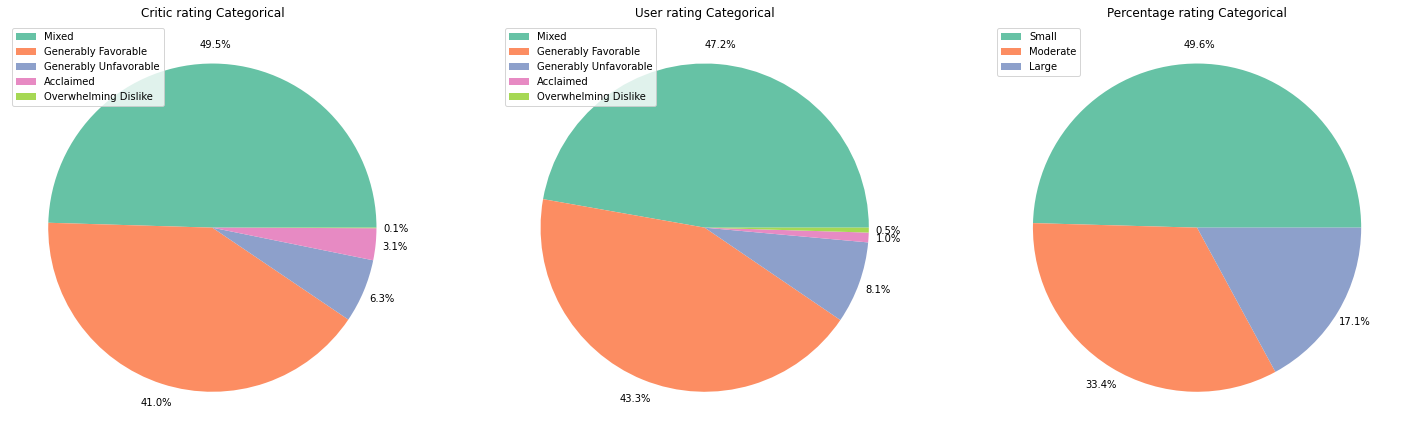

In [34]:
# bar chats(or pier chart) below
fig, (axes) = plt.subplots(1,3, figsize=(25,25))
color = sns.color_palette('Set2')
axes[0].pie(game_bins['critic_bin'].value_counts(), autopct='%1.1f%%', pctdistance=1.12,colors=color)
axes[0].legend(labels=game_bins['critic_bin'].value_counts().index, loc='upper left')
axes[0].set_title('Critic rating Categorical')
axes[1].pie(game_bins['user_bin'].value_counts(), autopct='%1.1f%%', pctdistance=1.12, colors=color)
axes[1].legend(labels=game_bins['user_bin'].value_counts().index, loc='upper left')
axes[1].set_title('User rating Categorical')
axes[2].pie(game_bins['percent_bin'].value_counts(), autopct='%1.1f%%', pctdistance=1.12,colors=color)
axes[2].legend(labels=game_bins['percent_bin'].value_counts().index, loc='upper left')
axes[2].set_title('Percentage rating Categorical')

Text(0.5, 1.0, 'Critic rating count through time periods')

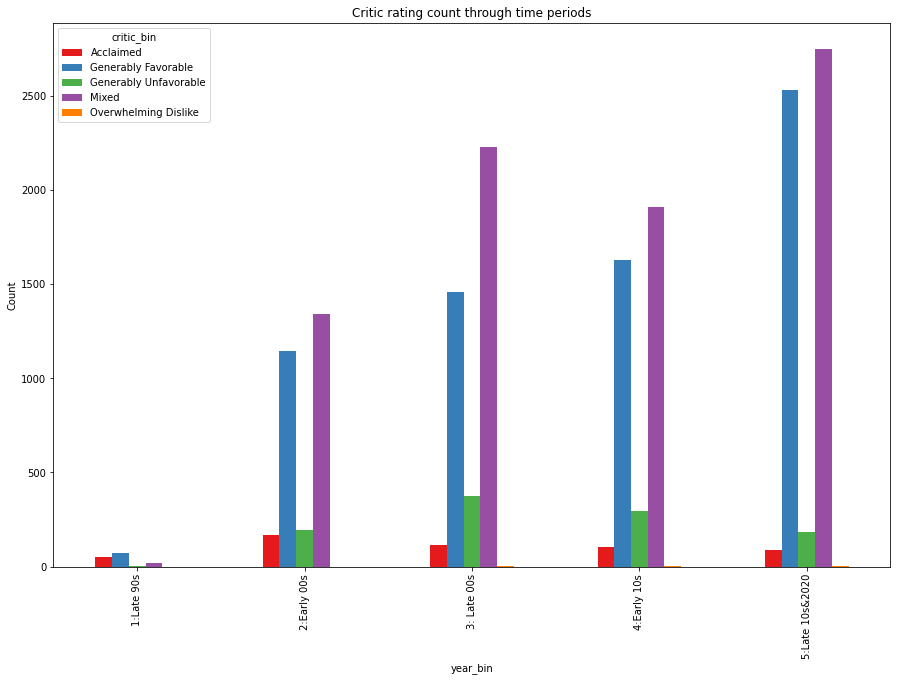

In [35]:
#bar charts of rating and percentage categories within each time period 
year_rating_c = game_bins.groupby(['year_bin','critic_bin'])['name'].count().unstack()
color= sns.color_palette('Set1')
year_rating_c.plot.bar(figsize=(15,10), color=color)
plt.ylabel('Count')
plt.title('Critic rating count through time periods')

Text(0.5, 1.0, 'User rating count through time periods')

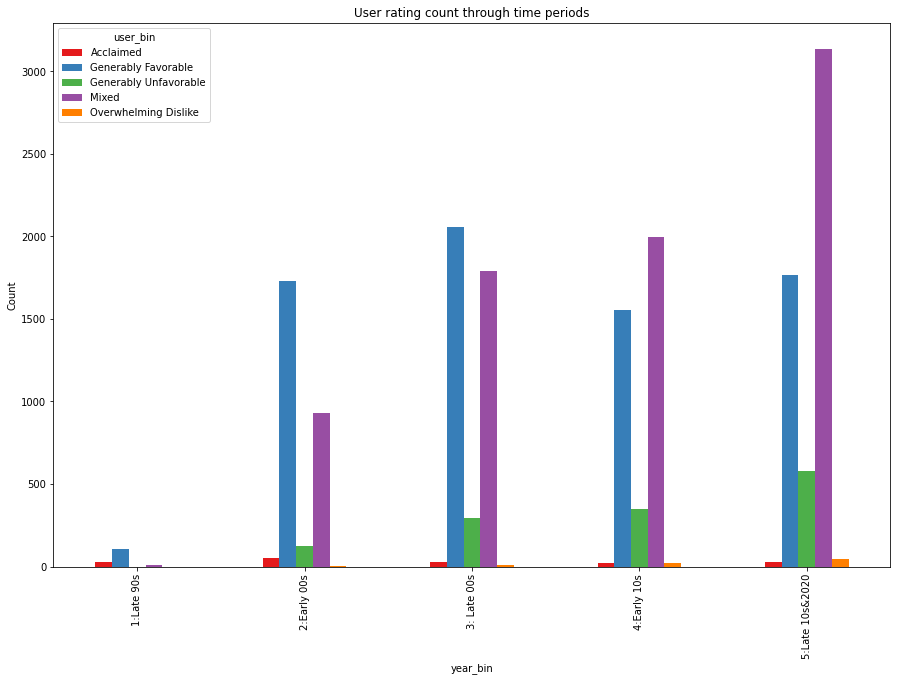

In [36]:
year_rating_u = game_bins.groupby(['year_bin','user_bin'])['name'].count().unstack()
year_rating_u.plot.bar(figsize=(15,10), color=color)
plt.ylabel('Count')
plt.title('User rating count through time periods')

Text(0.5, 1.0, 'Percent diffrence count through time periods')

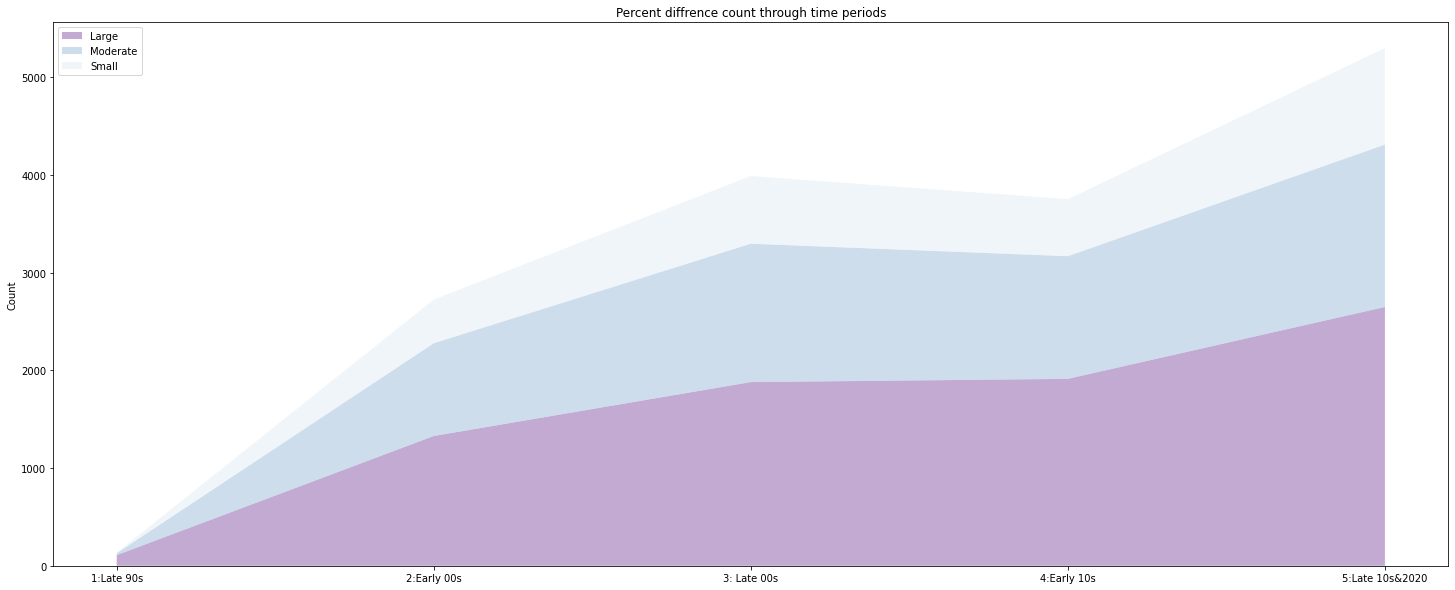

In [37]:
year_difference = game_bins.groupby(['year_bin','percent_bin'])['name'].count().unstack()
color = ['#8856a7','#9ebcda','#e0ecf4']
plt.figure(figsize=(25,10))
plt.stackplot(year_difference.index, year_difference['Small'],year_difference['Moderate'],year_difference['Large'], alpha=0.50, colors=color)
plt.ylabel('Count')
plt.legend(labels=year_difference.columns, loc='upper left')
plt.title('Percent diffrence count through time periods')

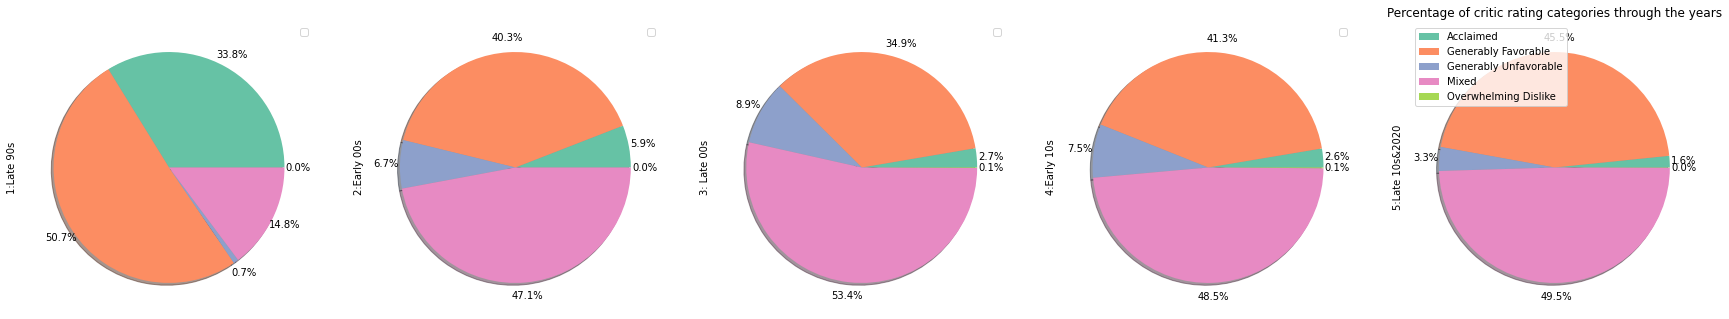

In [38]:
#pie charts of percentages of rating and percentage categories within time periods
year_rating_pieC = year_rating_c.transpose()
color = sns.color_palette('Set2')
year_rating_pieC.plot.pie(subplots=True, figsize=((30,40)), labels=None, shadow=True, autopct='%1.1f%%', pctdistance=1.12, colors=color)
plt.legend(labels=year_rating_pieC.index, loc='upper left')
plt.title('Percentage of critic rating categories through the years')
plt.show()

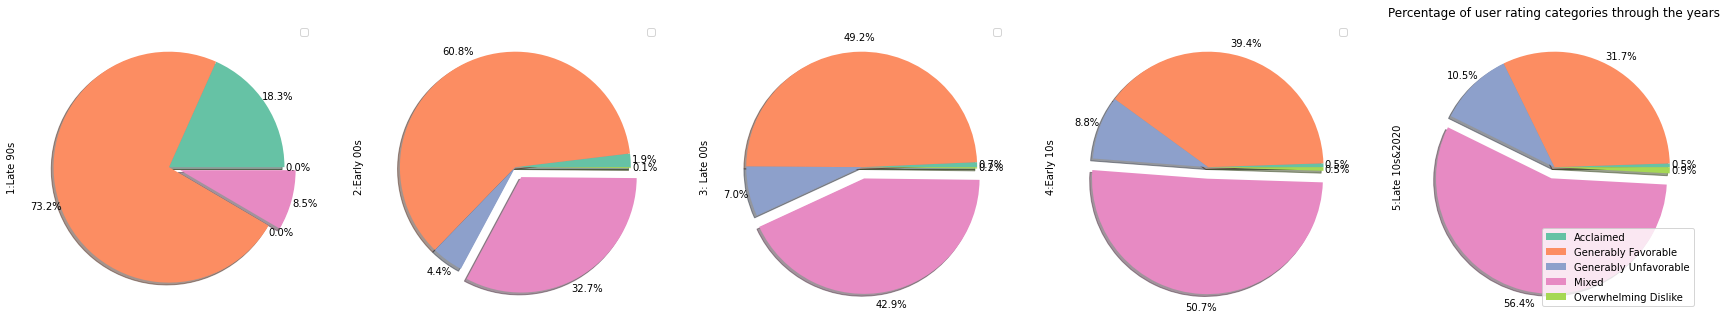

In [39]:
year_rating_pieU = year_rating_u.transpose()
explode = (0,0,0,0.1,0)
year_rating_pieU.plot.pie(subplots=True, figsize=((30,40)), labels=None, shadow=True, autopct='%1.1f%%', pctdistance=1.12, explode = explode, colors=color)
plt.legend(labels=year_rating_pieU.index, loc='lower right')
plt.title('Percentage of user rating categories through the years')
plt.show()

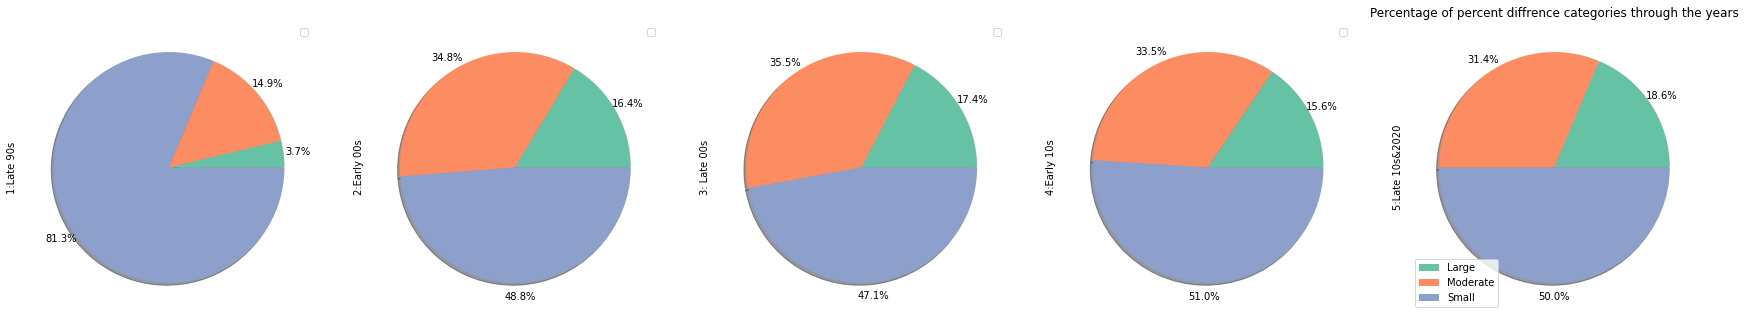

In [40]:
year_difference_pie = year_difference.transpose()
year_difference_pie.plot.pie(subplots=True, figsize=((30,40)), labels=None, shadow=True, autopct='%1.1f%%', pctdistance=1.12, colors=color)
plt.legend(labels=year_difference_pie.index, loc='lower left')
plt.title('Percentage of percent diffrence categories through the years')
plt.show()

In [41]:
#creating a matrix that compares user rating with what critics rated for the same game.
match_matrix = game_bins.groupby(['critic_bin','user_bin'])['name'].count().unstack()
match_matrix.replace(np.nan, 0, inplace=True)
match_matrix

user_bin,Acclaimed,Generably Favorable,Generably Unfavorable,Mixed,Overwhelming Dislike
critic_bin,,,,,
Acclaimed,79.0,366.0,2.0,75.0,0.0
Generably Favorable,70.0,4334.0,192.0,2223.0,13.0
Generably Unfavorable,0.0,82.0,457.0,473.0,33.0
Mixed,10.0,2425.0,691.0,5095.0,29.0
Overwhelming Dislike,0.0,0.0,4.0,0.0,5.0


In [42]:
#converting matrix to percentages
for i, name in enumerate(match_matrix.columns):
    match_matrix[name] = (match_matrix[name] / match_matrix[name].sum()) * 100 
match_matrix    

user_bin,Acclaimed,Generably Favorable,Generably Unfavorable,Mixed,Overwhelming Dislike
critic_bin,,,,,
Acclaimed,49.685535,5.078396,0.148588,0.953471,0.00
Generably Favorable,44.025157,60.135979,14.264487,28.260870,16.25
Generably Unfavorable,0.000000,1.137783,33.952452,6.013221,41.25
Mixed,6.289308,33.647842,51.337296,64.772438,36.25
Overwhelming Dislike,0.000000,0.000000,0.297177,0.000000,6.25


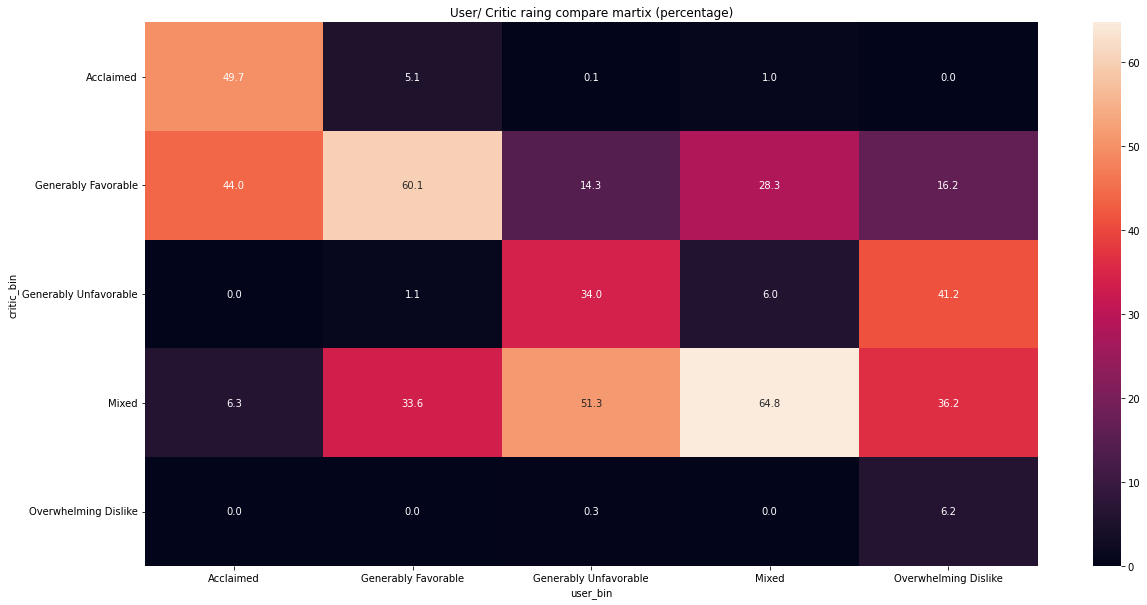

In [43]:
plt.figure(figsize=(20,10))
sns.heatmap(match_matrix, annot=True, fmt=".1f")
plt.title('User/ Critic raing compare martix (percentage)')
plt.show()

In [44]:
# list of popular platforms by number of user ratings
console_best = game_scores.groupby('platform')['users amount'].sum()
console_best.sort_values(ascending=False, inplace=True)
console_best

platform
PC                 1217253
PlayStation4        762422
PlayStation3        243150
Xbox360             235943
XboxOne             149150
Switch              118772
PlayStation2         84161
3DS                  45975
Wii                  40576
WiiU                 37559
DS                   30413
PlayStationVita      22755
GameCube             21249
PlayStation          21143
PSP                  19787
Xbox                 19284
Nintendo64           15032
GameBoyAdvance       12599
Dreamcast             3412
Stadia                  41
Name: users amount, dtype: int64

Text(0.5, 1.0, 'Platform popularity according the user count (Log scale)')

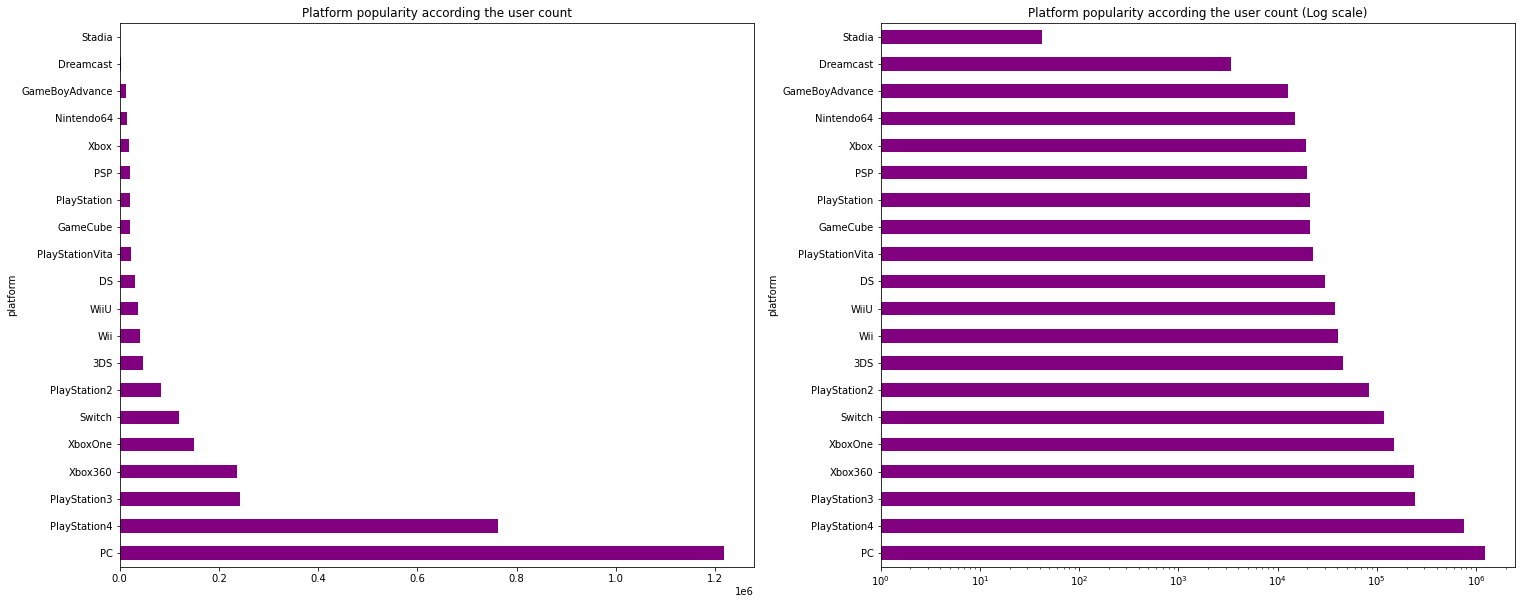

In [45]:
fig, (axes) = plt.subplots(1,2, figsize=(25,10))
console_best.plot.barh(ax=axes[0],color='purple')
axes[0].set_title('Platform popularity according the user count')
console_best.plot.barh(log=True, ax=axes[1],color='purple')
axes[1].set_title('Platform popularity according the user count (Log scale)')

In [46]:
# developer bar chart
developer_best= game_scores.groupby('developer')['critic score','user score','percent_difference'].mean()
developer_best['count'] = game_scores.groupby('developer')['name'].count()
developer_best_c = (developer_best.sort_values('critic score', ascending=False)).loc[developer_best['count'] > 2]
developer_best_u = (developer_best.sort_values('user score', ascending=False)).loc[developer_best['count'] > 2]
developer_best_p = (developer_best.sort_values('percent_difference')).loc[developer_best['count'] > 2]
developer_best_p

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,critic score,user score,percent_difference,count
developer,,,,
GalaxyTrail,83.000000,83.000000,0.803475,3
VertexPop,71.666667,72.666667,1.284808,3
LookingGlassStudios,88.000000,88.000000,1.490176,3
TerryCavanagh,81.000000,79.750000,1.545245,4
RayarkInc.,76.666667,77.333333,1.744469,3
...,...,...,...,...
Bungie,72.058824,45.529412,55.480265,17
FrontierDevelopments,72.382353,45.235294,55.633427,34
"EASports,EAVancouver",84.333333,47.666667,55.818944,3


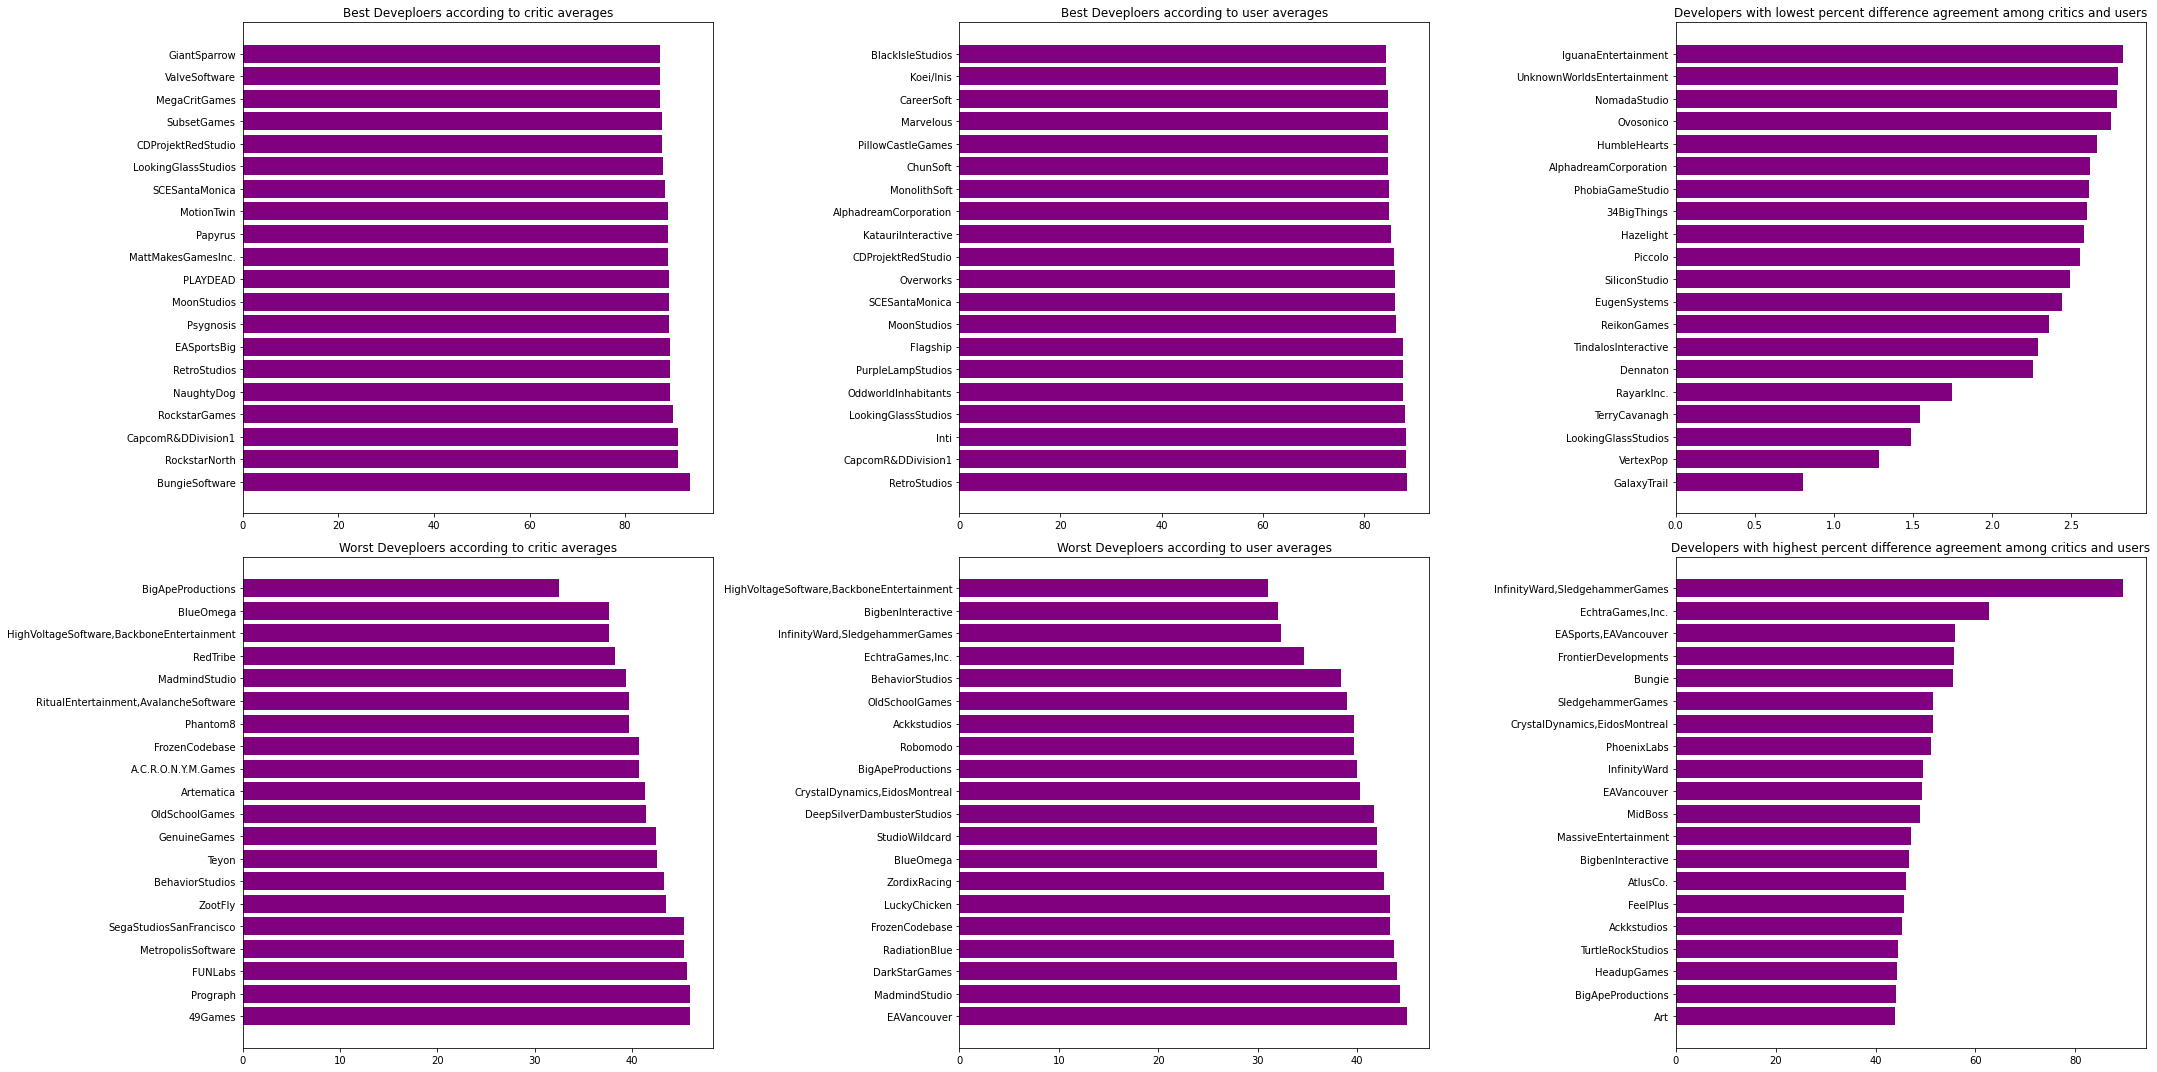

In [47]:
#best, worst, developers along with lowest and highest percent differences  
fig, axes = plt.subplots(2,3, figsize=(30,15))
axes[0,0].barh(y=developer_best_c.head(20).index, width=developer_best_c['critic score'].head(20),color='purple')
axes[0,0].set_title('Best Deveploers according to critic averages')
axes[0,1].barh(y=developer_best_u.head(20).index, width=developer_best_u['user score'].head(20),color='purple')
axes[0,1].set_title('Best Deveploers according to user averages')
axes[0,2].barh(y=developer_best_p.head(20).index, width=developer_best_p['percent_difference'].head(20),color='purple')
axes[0,2].set_title('Developers with lowest percent difference agreement among critics and users')
axes[1,0].barh(y=developer_best_c.tail(20).index, width=developer_best_c['critic score'].tail(20),color='purple')
axes[1,0].set_title('Worst Deveploers according to critic averages')
axes[1,1].barh(y=developer_best_u.tail(20).index, width=developer_best_u['user score'].tail(20),color='purple')
axes[1,1].set_title('Worst Deveploers according to user averages')
axes[1,2].barh(y=developer_best_p.tail(20).index, width=developer_best_p['percent_difference'].tail(20),color='purple')
axes[1,2].set_title('Developers with highest percent difference agreement among critics and users')

fig.tight_layout()

In [48]:
#year histogram
years_avg = game_scores.groupby('r-year')['critic score','user score','percent_difference'].mean()
years_avg

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,critic score,user score,percent_difference
r-year,,,
1995,86.000000,86.000000,0.000000
1996,85.450000,83.550000,7.159252
1997,85.185185,84.592593,5.940481
1998,83.186047,83.953488,5.908057
1999,83.470588,84.764706,7.886158
2000,73.810458,75.931373,13.238858
2001,72.326489,75.244353,12.467120
2002,71.318113,74.321157,13.844611
2003,71.281806,75.466484,13.460243


Text(0.5, 1.0, 'Percent difference through the years')

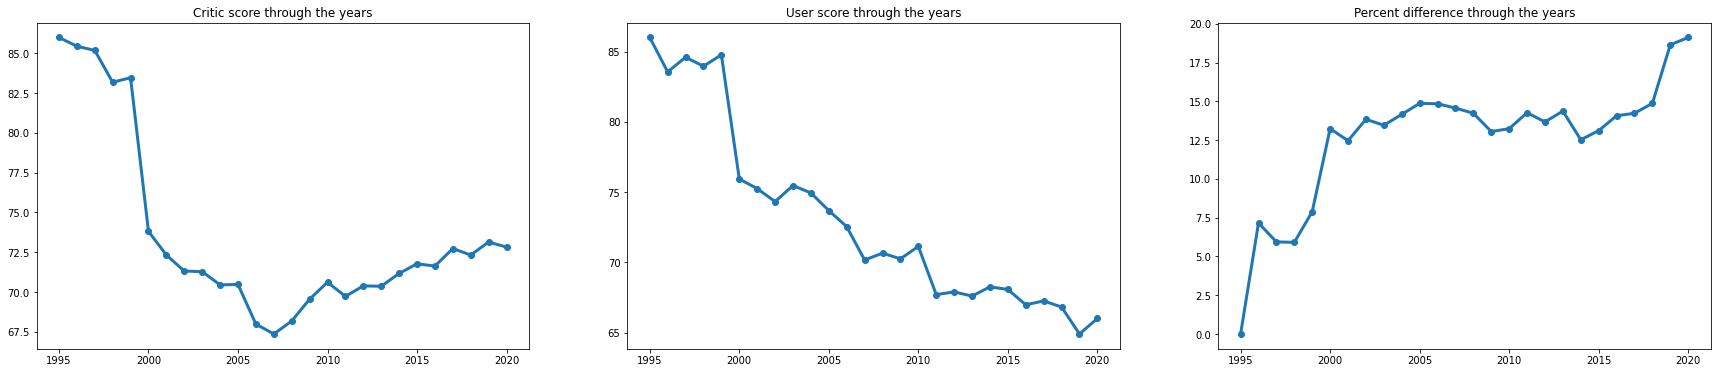

In [49]:
#critic and user score and percent difference average throughout the years
fig, axes = plt.subplots(1,3, sharex=True, figsize=(30,6))
axes[0].plot(years_avg['critic score'], linewidth = 3, marker='o')
axes[0].set_title('Critic score through the years')
axes[1].plot(years_avg['user score'], linewidth = 3, marker='o')
axes[1].set_title('User score through the years')
axes[2].plot(years_avg['percent_difference'], linewidth = 3, marker='o')
axes[2].set_title('Percent difference through the years')

In [50]:
# critic, user and game count throughtout the years
years_count = game_scores.groupby('r-year')['critics amount','users amount'].sum()
years_count['game count'] = game_scores.groupby('r-year')['name'].count()
years_count

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,critics amount,users amount,game count
r-year,,,
1995,8,181,1
1996,187,5820,20
1997,314,7785,27
1998,582,21237,43
1999,817,10549,51
2000,4829,29165,306
2001,7654,34328,487
2002,11602,34381,657
2003,15828,47410,731


Text(0.5, 1.0, 'Game release growth')

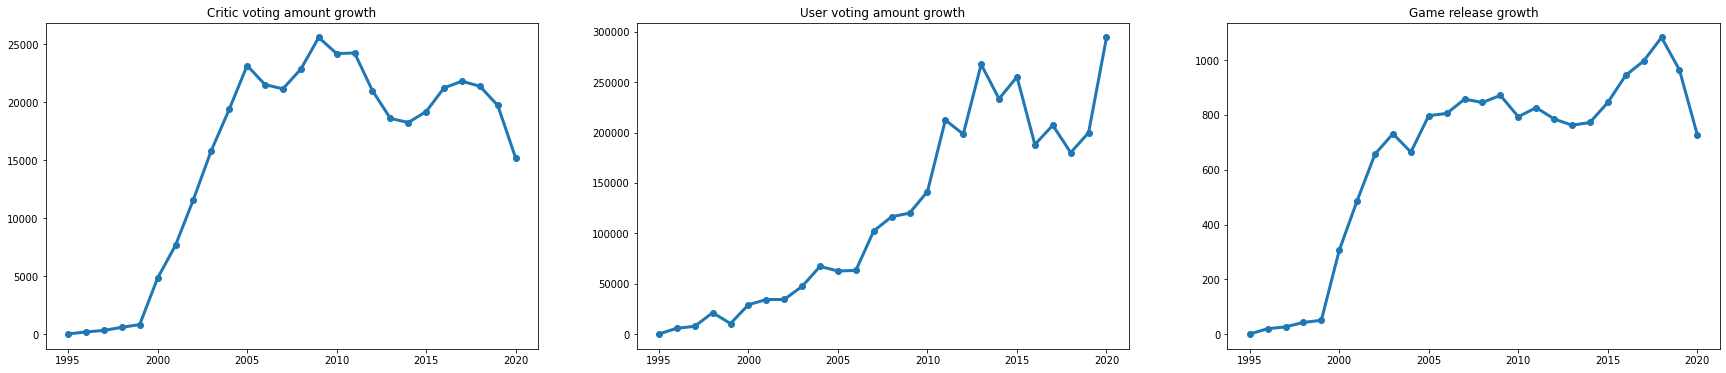

In [51]:
#critic, user, and game amount throughout the years
fig, axes = plt.subplots(1,3, sharex=True, figsize=(30,6))
axes[0].plot(years_count['critics amount'], linewidth = 3, marker='o')
axes[0].set_title('Critic voting amount growth')
axes[1].plot(years_count['users amount'], linewidth = 3, marker='o')
axes[1].set_title('User voting amount growth')
axes[2].plot(years_count['game count'], linewidth = 3, marker='o')
axes[2].set_title('Game release growth')